In [27]:
import json
import random

def get_acc(filename):
    data = []
    with open(filename) as file:
        for line in file.readlines():
            data.append(json.loads(line))
        # data = json.load(file)
    
    acc_list  = []
    for i in range(5):
        # Randomly sample 70 data points from 0 to 100
        # Generate random list of 70 numbers
        random_list = random.sample(range(0, 100), 70)
        acc = 0
        for j in random_list:
            d = data[j]
            correct_answer = float(d['correct_answer'])
            model_short_answer = float(d['model_short_answer'])
            acc += 1 if correct_answer == model_short_answer else 0
        acc_list.append(acc/70)
    # Return the average accuracy, with a decimal point of 2
    return round(sum(acc_list)/5, 4)

In [29]:
# print(get_acc('results/base_llama_gsm_8k_100samples.json'))
print(get_acc('results/base_llama_gsm_8k_verify_100samples.json'))
print(get_acc('results/llama_verify.json'))
print(get_acc('results/llama_rag_verify.json'))

0.32
0.2943
0.28


In [53]:
# Get the average number of verify steps for the base model

def get_verify_steps(filename):
    data = []
    with open(filename) as file:
        for line in file.readlines():
            data.append(json.loads(line))
        # data = json.load(file)
    
    verify_steps = []
    verified = 0
    for d in data:
        verify_steps.append(int(d['verify_step']))
        try:
            verified += 1 if d['verified'] else 0
        except:
            verified += 1 if int(d['verify_step']) < 5 else 0
    return sum(verify_steps)/len(verify_steps), verified

def get_verified_steps_for_correct_and_wrong_answers(filename):
    data = []
    with open(filename) as file:
        for line in file.readlines():
            data.append(json.loads(line))
        # data = json.load(file)
    verified_correct = 0
    unverified_correct = 0
    verified_wrong = 0
    unverified_wrong = 0
    steps_correct = 0
    steps_wrong = 0
        
    for d in data:
        
        if d['correct_answer'] == d['model_short_answer']:
            try:
                verified_correct += 1 if d['verified'] else 0
            except:
                verified_correct += 1 if int(d['verify_step']) < 5 else 0
            try:
                unverified_correct += 1 if not d['verified'] else 0
            except:
                unverified_correct += 1 if int(d['verify_step']) >= 5 else 0
            steps_correct += int(d['verify_step'])
        else:
            try:
                verified_wrong += 1 if d['verified'] else 0
            except:
                verified_wrong += 1 if int(d['verify_step']) < 5 else 0
            try:
                unverified_wrong += 1 if not d['verified'] else 0
            except:
                unverified_wrong += 1 if int(d['verify_step']) >= 5 else 0
            steps_wrong += int(d['verify_step'])
    return verified_correct, unverified_correct, verified_wrong, unverified_wrong, steps_correct, steps_wrong
        
print(get_verified_steps_for_correct_and_wrong_answers(filename='results/base_llama_gsm_8k_verify_100samples.json'))

verified_correct, unverified_correct, verified_wrong, unverified_wrong, steps_correct, steps_wrong = get_verified_steps_for_correct_and_wrong_answers(filename='results/base_llama_gsm_8k_verify_100samples.json')


(27, 6, 42, 25, 72, 206)


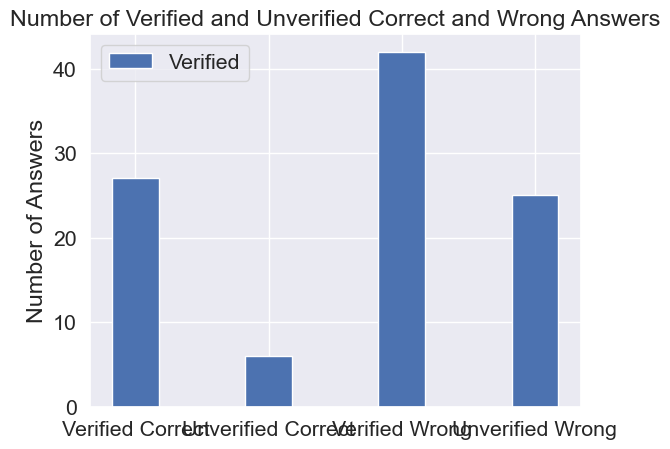

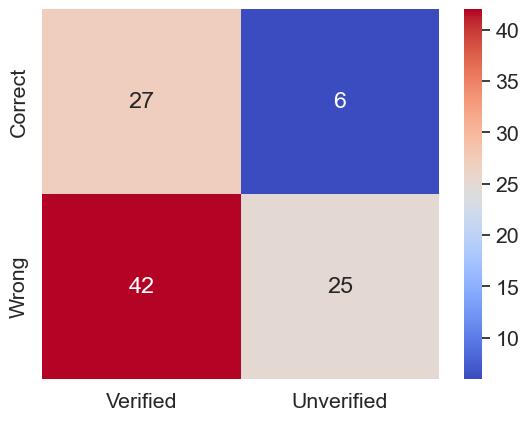

In [54]:
# Plot a confusion matrix with the number of verified and unverified correct and wrong answers

import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(data):
    verified_correct, unverified_correct, verified_wrong, unverified_wrong, steps_correct, steps_wrong = data
    labels = ['Verified Correct', 'Unverified Correct', 'Verified Wrong', 'Unverified Wrong']
    verified = [verified_correct, unverified_correct, verified_wrong, unverified_wrong]
    x = np.arange(len(labels))
    width = 0.35
    fig, ax = plt.subplots()
    rects1 = ax.bar(x, verified, width, label='Verified')
    ax.set_ylabel('Number of Answers')
    ax.set_title('Number of Verified and Unverified Correct and Wrong Answers')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    fig.tight_layout()
    plt.show()

plot_confusion_matrix(get_verified_steps_for_correct_and_wrong_answers(filename='results/base_llama_gsm_8k_verify_100samples.json'))


x = [verified_correct, unverified_correct]
y = [verified_wrong, unverified_wrong]

# Heatmap of the number of verified and unverified correct and wrong answers

import seaborn as sns
import pandas as pd

def plot_heatmap(data):
    verified_correct, unverified_correct, verified_wrong, unverified_wrong, steps_correct, steps_wrong = data
    data = {'Verified': [verified_correct, verified_wrong], 'Unverified': [unverified_correct, unverified_wrong]}
    df = pd.DataFrame(data, columns=['Verified', 'Unverified'])
    #Plot the y axis legent - correct and wrong
    
    sns.set(font_scale=1.4)
    sns.heatmap(df, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Verified', 'Unverified'], yticklabels=['Correct', 'Wrong'])
    plt.show()
    
plot_heatmap(get_verified_steps_for_correct_and_wrong_answers(filename='results/base_llama_gsm_8k_verify_100samples.json'))

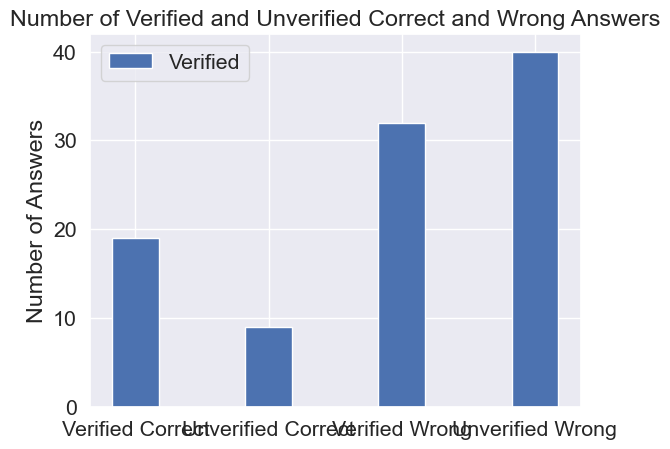

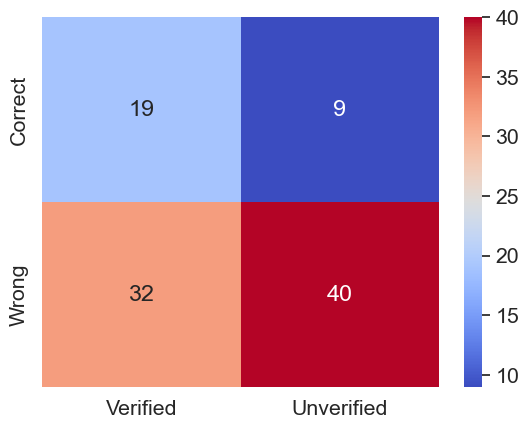

In [57]:
verified_correct, unverified_correct, verified_wrong, unverified_wrong, steps_correct, steps_wrong = get_verified_steps_for_correct_and_wrong_answers(filename='results/llama_verify_1_rag.json')

# Plit the confusion matrix for the RAG model
plot_confusion_matrix((verified_correct, unverified_correct, verified_wrong, unverified_wrong, steps_correct, steps_wrong))

# Plot the heatmap for the RAG model
plot_heatmap((verified_correct, unverified_correct, verified_wrong, unverified_wrong, steps_correct, steps_wrong))


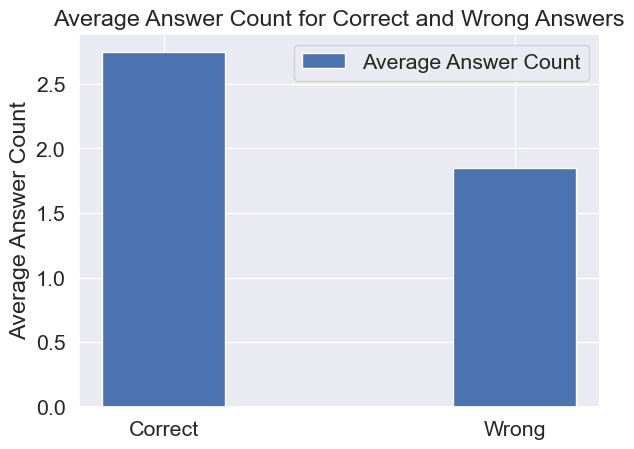

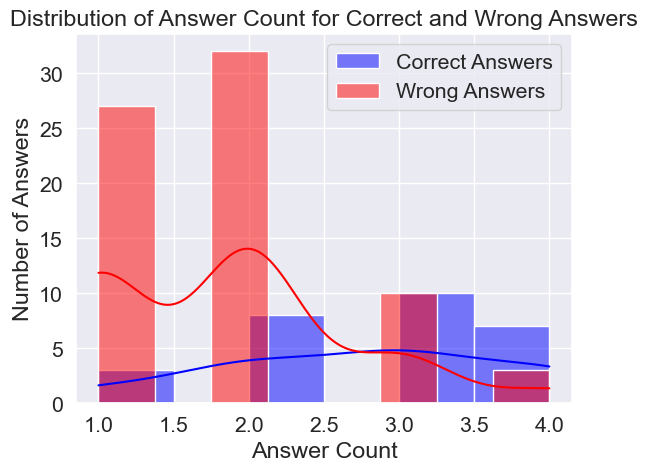

In [48]:
# Get the ans_cnt for wrong and right answers

def get_ans_cnt(filename):
    data = []
    with open(filename) as file:
        for line in file.readlines():
            data.append(json.loads(line))
        # data = json.load(file)
    ans_cnt_correct = 0
    ans_cnt_wrong = 0
    correct_ans = 0
    wrong_ans = 0
    
    ans_cnt_list_correct = []
    ans_cnt_list_wrong = []
        
    for d in data:
        if d['correct_answer'] == d['model_short_answer']:
            ans_cnt_correct += int(d['ans_cnt'])
            ans_cnt_list_correct.append(int(d['ans_cnt']))
            correct_ans += 1
        else:
            ans_cnt_wrong += int(d['ans_cnt'])
            ans_cnt_list_wrong.append(int(d['ans_cnt']))
            wrong_ans += 1
    
    return ans_cnt_correct / correct_ans, ans_cnt_wrong / wrong_ans, ans_cnt_list_correct, ans_cnt_list_wrong


avg_correct_ans, avg_wrong_ans, ans_cnt_list_correct, ans_cnt_list_wrong = get_ans_cnt(filename='results/llama_verify.json')
# print(get_ans_cnt(filename='results/llama_verify.json'))

# Plot these 2
def plot_ans_cnt(data):
    avg_correct_ans, avg_wrong_ans = data
    labels = ['Correct', 'Wrong']
    ans_cnt = [avg_correct_ans, avg_wrong_ans]
    x = np.arange(len(labels))
    width = 0.35
    fig, ax = plt.subplots()
    rects1 = ax.bar(x, ans_cnt, width, label='Average Answer Count')
    ax.set_ylabel('Average Answer Count')
    ax.set_title('Average Answer Count for Correct and Wrong Answers')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    fig.tight_layout()
    plt.show()

plot_ans_cnt(data=(avg_correct_ans, avg_wrong_ans))

#PLOT the distribution of the answer count for correct and wrong answers
def plot_ans_cnt_distribution(data):
    ans_cnt_list_correct, ans_cnt_list_wrong = data
    sns.set(font_scale=1.4)
    sns.histplot(ans_cnt_list_correct, kde=True, color='blue', label='Correct Answers')
    sns.histplot(ans_cnt_list_wrong, kde=True, color='red', label='Wrong Answers')
    plt.xlabel('Answer Count')
    plt.ylabel('Number of Answers')
    plt.title('Distribution of Answer Count for Correct and Wrong Answers')
    plt.legend()
    plt.show()
    
plot_ans_cnt_distribution(data=(ans_cnt_list_correct, ans_cnt_list_wrong))

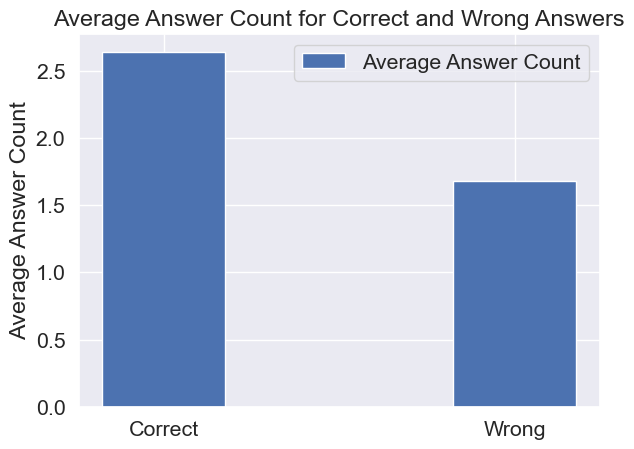

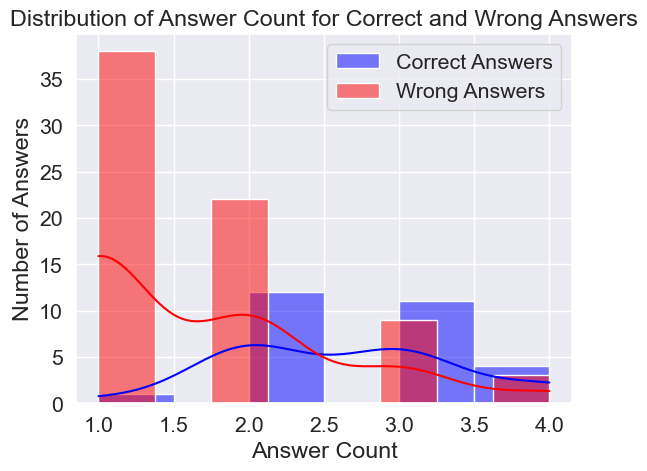

In [58]:
avg_correct_ans, avg_wrong_ans, ans_cnt_list_correct, ans_cnt_list_wrong = get_ans_cnt(filename='results/llama_rag_verify.json')

plot_ans_cnt(data=(avg_correct_ans, avg_wrong_ans))
plot_ans_cnt_distribution(data=(ans_cnt_list_correct, ans_cnt_list_wrong))